# VISUALIZATION LAB - Continuation of the EuroLeague Case Study
## Let's compare the competitions!

![](https://eurospects.com/wp-content/uploads/2018/10/eurocupeuroleague.png)

First of all, we must 

- Import the actual.csv Dataset. This dataset will be the CSV of the result obtained in class.
- Import ec23.xlsx. This dataset correspond to the import the dataset corresponding to Eurocup. Don't worry, this time the Excel will be cleaned (almost)


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
league=pd.read_csv("C:/Users/matte/Documents/CSV/actual.csv")
cup=pd.read_excel("C:/Users/matte/Documents/XLS/ec2023.xlsx", index_col=False)

Based on the last lab, you should  have the combination of both competitions in the same dataframe. 

Is time for the questions you must answer... Graphically!

1. How many matches have been in each competition?
2. What are the maximum points that a local team has scored per competition? And the road team as well. 
3. Do the same operations with the average points (per competition)
4. Can you tell me the maximum difference that has been in a match, splitted by competition? 
    - Careful: The Plusminus is both positive and negative, being negative that the Road Team has achieved the Victory. To have the absolute, create a new Column named Absolut_Plusminus. Remember: np.where is life!
5. Also grouped by competition, give me the number of victories of the Locals and the Visitors

In [4]:
competition

NameError: name 'competition' is not defined

In [8]:
cup['Competition'] = 'Eurocup'
cup.rename(columns={'Winner': 'Ganador'}, inplace=True)
cup.columns = cup.columns.str.capitalize()
cup

,Unnamed: 0,Fecha,Ronda,Local,Visitante,Localscore,Roadscore,Ganador,Plusminus,Competition
0,0,2024-01-31T21:00:00,17,Dreamland Gran Canaria,U-BT Cluj-Napoca,111,113.0,Visitante,-2.0,Eurocup
1,1,2024-01-31T20:00:00,17,Dolomiti Energia Trento,Buducnost VOLI Podgorica,78,97.0,Visitante,-19.0,Eurocup
2,2,2024-01-31T19:30:00,17,ratiopharm Ulm,Aris Midea Thessaloniki,66,86.0,Visitante,-20.0,Eurocup
3,3,2024-01-31T18:30:00,17,Cedevita Olimpija Ljubljana,London Lions,85,92.0,Visitante,-7.0,Eurocup
4,4,2024-01-31T18:00:00,17,Turk Telekom Ankara,Mincidelice JL Bourg en Bresse,64,68.0,Visitante,-4.0,Eurocup
...,...,...,...,...,...,...,...,...,...,...
168,165,2023-10-04T18:00:00,1,U-BT Cluj-Napoca,Turk Telekom Ankara,80,71.0,Local,9.0,Eurocup
169,166,2023-10-04T18:00:00,1,Prometey Slobozhanske,Veolia Towers Hamburg,97,77.0,Local,20.0,Eurocup
170,167,2023-10-03T20:30:00,1,Paris Basketball,Wolves Vilnius,105,78.0,Local,27.0,Eurocup
171,168,2023-10-03T19:30:00,1,ratiopharm Ulm,Dolomiti Energia Trento,80,70.0,Local,10.0,Eurocup


In [9]:
comp_el = league[['Competition', 'Localscore', 'Roadscore', 'Plusminus', 'Ganador']]
comp_ec = cup[['Competition', 'Localscore', 'Roadscore', 'Plusminus', 'Ganador']]
competition = pd.concat([comp_el, comp_ec])
competition

,Competition,Localscore,Roadscore,Plusminus,Ganador
0,Euroleague,94,73.0,21.0,Local
1,Euroleague,96,81.0,15.0,Local
2,Euroleague,79,82.0,-3.0,Visitante
3,Euroleague,80,68.0,12.0,Local
4,Euroleague,91,74.0,17.0,Local
...,...,...,...,...,...
168,Eurocup,80,71.0,9.0,Local
169,Eurocup,97,77.0,20.0,Local
170,Eurocup,105,78.0,27.0,Local
171,Eurocup,80,70.0,10.0,Local


In [10]:
# 1
partidos_por_comp = competition['Competition'].value_counts()
print("Número de partidos por competición:")
print(partidos_por_comp)

Número de partidos por competición:
Competition
Euroleague    225
Eurocup       173
Name: count, dtype: int64


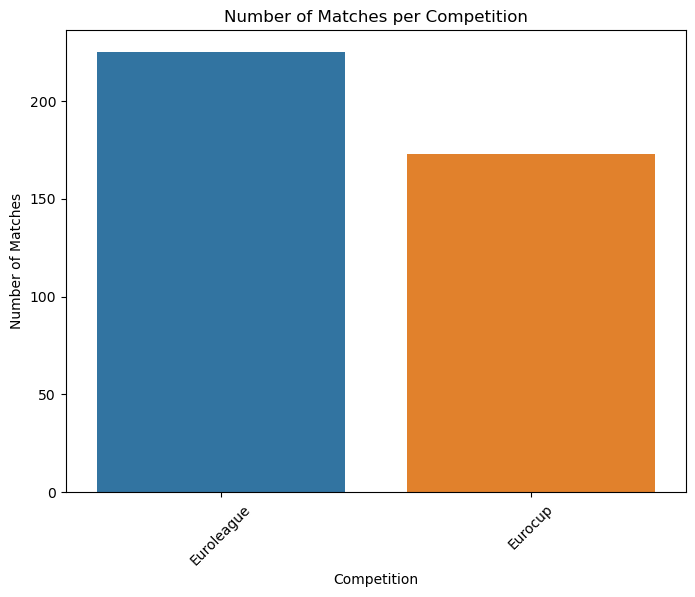

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(data=competition, x='Competition')
plt.title('Number of Matches per Competition')
plt.xlabel('Competition')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

In [11]:
# 2
max_local_por_comp = competition.groupby('Competition')['Localscore'].max()
max_visitante_por_comp = competition.groupby('Competition')['Roadscore'].max()
print("Máximo de puntos conseguido por equipo local por competición:")
print(max_local_por_comp)
print("\nMáximo de puntos conseguido por equipo visitante por competición:")
print(max_visitante_por_comp)

Máximo de puntos conseguido por equipo local por competición:
Competition
Eurocup       120
Euroleague    130
Name: Localscore, dtype: int64

Máximo de puntos conseguido por equipo visitante por competición:
Competition
Eurocup       114.0
Euroleague    126.0
Name: Roadscore, dtype: float64


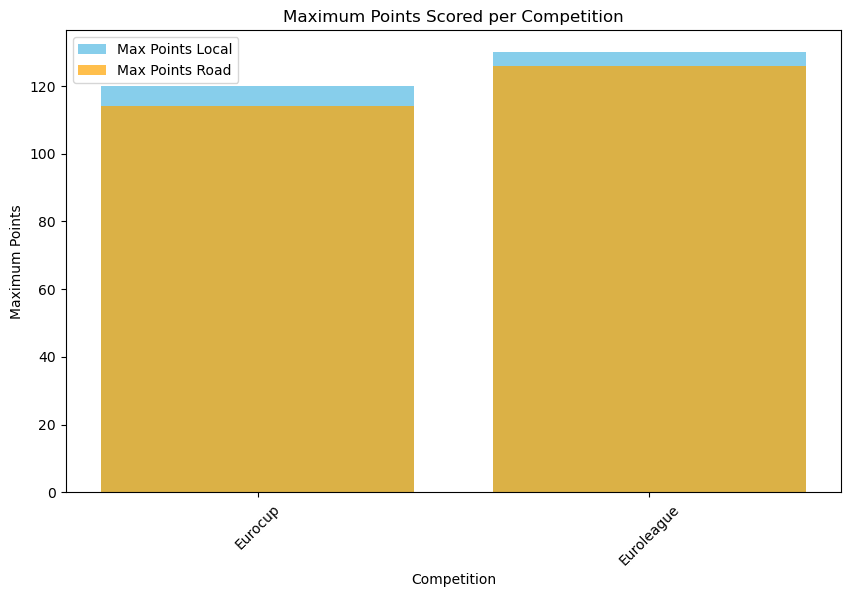

In [49]:
max_points_local = competition.groupby('Competition')['Localscore'].max()
max_points_road = competition.groupby('Competition')['Roadscore'].max()

plt.figure(figsize=(10, 6))
plt.bar(max_points_local.index, max_points_local.values, color='skyblue', label='Max Points Local')
plt.bar(max_points_road.index, max_points_road.values, color='orange', label='Max Points Road', alpha=0.7)
plt.title('Maximum Points Scored per Competition')
plt.xlabel('Competition')
plt.ylabel('Maximum Points')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [12]:
# 3
media_puntos_por_comp = competition.groupby('Competition')[['Localscore', 'Roadscore']].mean()
print("Media de puntos por competición:")
print(media_puntos_por_comp)

Media de puntos por competición:
             Localscore  Roadscore
Competition                       
Eurocup       85.150289  83.936047
Euroleague    83.284444  79.173333


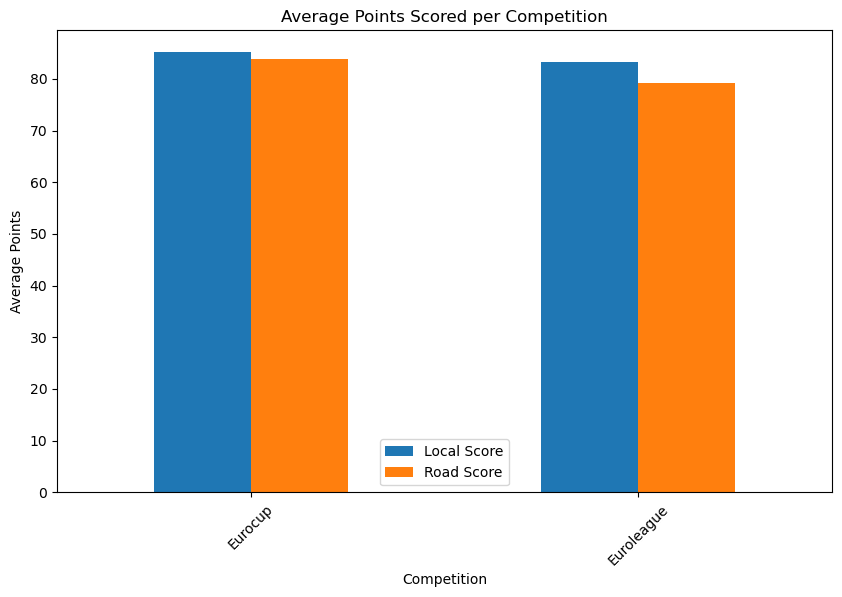

In [48]:
average_points = competition.groupby('Competition')[['Localscore', 'Roadscore']].mean()

average_points.plot(kind='bar', figsize=(10, 6))
plt.title('Average Points Scored per Competition')
plt.xlabel('Competition')
plt.ylabel('Average Points')
plt.xticks(rotation=45)
plt.legend(['Local Score', 'Road Score'])
plt.show()

In [13]:
# 4
competition['Absolut_Plusminus'] = competition['Plusminus'].abs()
max_diferencia_por_comp = competition.groupby('Competition')['Absolut_Plusminus'].max()
print("Diferencia máxima de puntos por partido dividida por competición:")
print(max_diferencia_por_comp)

Diferencia máxima de puntos por partido dividida por competición:
Competition
Eurocup       39.0
Euroleague    39.0
Name: Absolut_Plusminus, dtype: float64


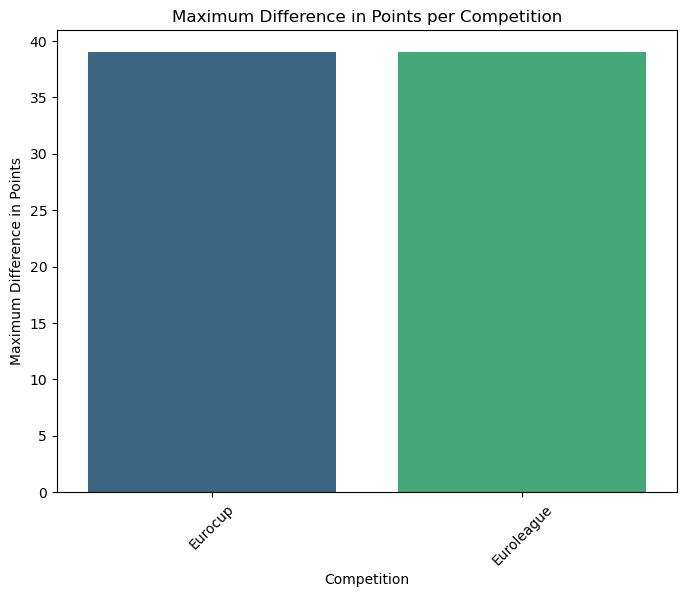

In [47]:
competition['Absolute_Plusminus'] = competition['Plusminus'].abs()

max_difference = competition.groupby('Competition')['Absolute_Plusminus'].max()

plt.figure(figsize=(8, 6))
sns.barplot(x=max_difference.index, y=max_difference.values, palette='viridis')
plt.title('Maximum Difference in Points per Competition')
plt.xlabel('Competition')
plt.ylabel('Maximum Difference in Points')
plt.xticks(rotation=45)
plt.show()

In [14]:
# 5
victorias_locales = competition[competition['Ganador'] == 'Local'].groupby('Competition').size()
victorias_visitantes = competition[competition['Ganador'] == 'Visitante'].groupby('Competition').size()
print("Número de victorias de los locales por competición:")
print(victorias_locales)
print("Número de victorias de los visitantes por competición:")
print(victorias_visitantes)

Número de victorias de los locales por competición:
Competition
Eurocup        91
Euroleague    150
dtype: int64
Número de victorias de los visitantes por competición:
Competition
Eurocup       82
Euroleague    75
dtype: int64


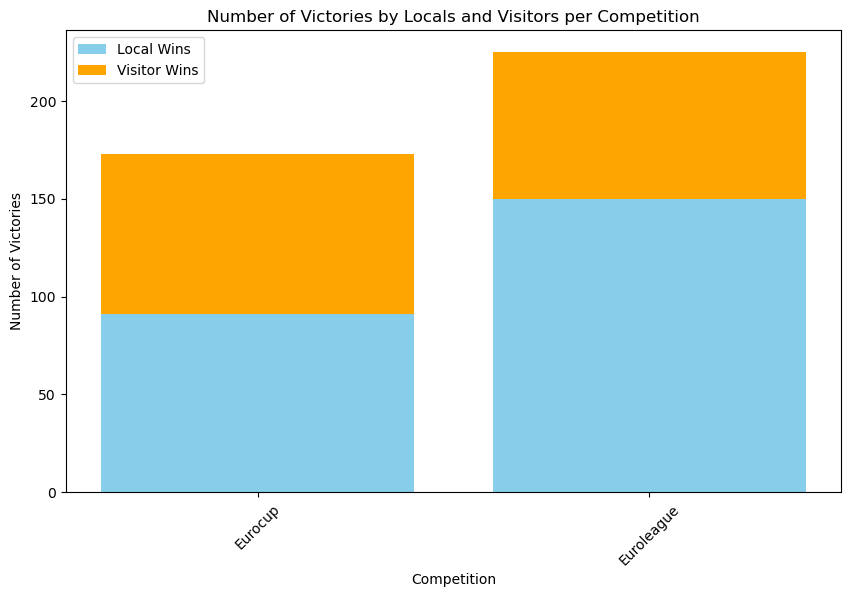

In [46]:
local_wins = competition[competition['Ganador'] == 'Local']
visitor_wins = competition[competition['Ganador'] == 'Visitante']

local_victories = local_wins.groupby('Competition').size()
visitor_victories = visitor_wins.groupby('Competition').size()

plt.figure(figsize=(10, 6))
plt.bar(local_victories.index, local_victories.values, color='skyblue', label='Local Wins')
plt.bar(visitor_victories.index, visitor_victories.values, color='orange', bottom=local_victories.values, label='Visitor Wins')
plt.title('Number of Victories by Locals and Visitors per Competition')
plt.xlabel('Competition')
plt.ylabel('Number of Victories')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# More Graphs!

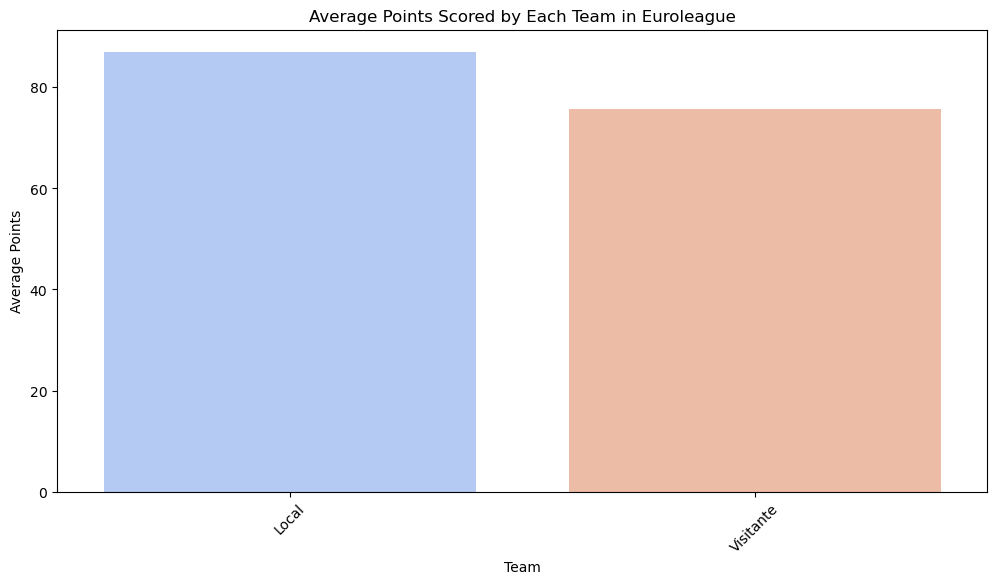

In [52]:
# Comparison Chart
average_points_euroleague = competition[competition['Competition'] == 'Euroleague'].groupby('Ganador')['Localscore'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=average_points_euroleague.index, y=average_points_euroleague.values, palette='coolwarm')
plt.title('Average Points Scored by Each Team in Euroleague')
plt.xlabel('Team')
plt.ylabel('Average Points')
plt.xticks(rotation=45)
plt.show()

**Your comments here**
- # En color azul vemos como la media de puntos de los equipos ganadores en la Euroliga.
- # Vemos en color piel como la media de puntos de los equipos cuandos son visitantes es menor.

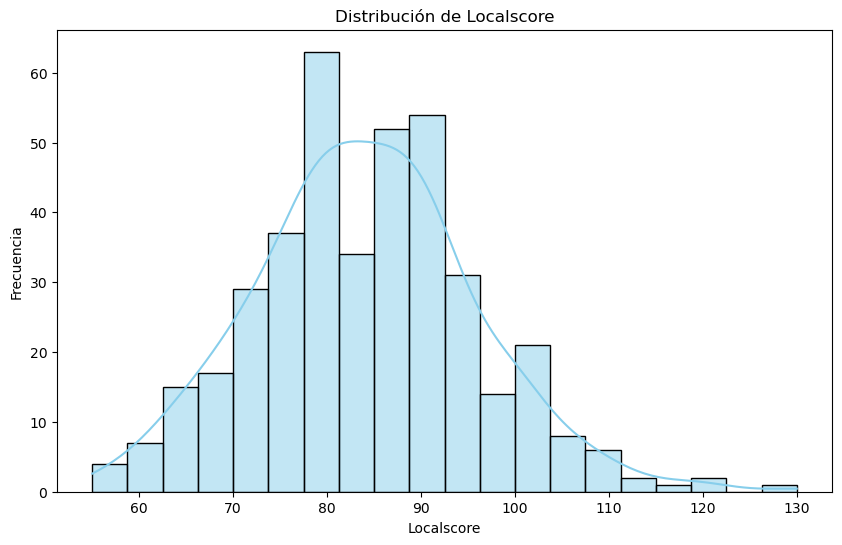

In [28]:
#Histogram
plt.figure(figsize=(10, 6))
sns.histplot(competition['Localscore'], bins=20, kde=True, color='skyblue')
plt.xlabel('Localscore')
plt.ylabel('Frecuencia')
plt.title('Distribución de Localscore')
plt.show()

**Your comments here**
- # Aqui podemos ver como la media de entre 75 y 95 puntos son los localscore que con mas frecuencia se dan entre los partidos de liga y copa
- # Tambien se ve como la frecuencia baja entre los extremos de localscore

In [59]:
# Stacked columns


**Your comments here**
-
-

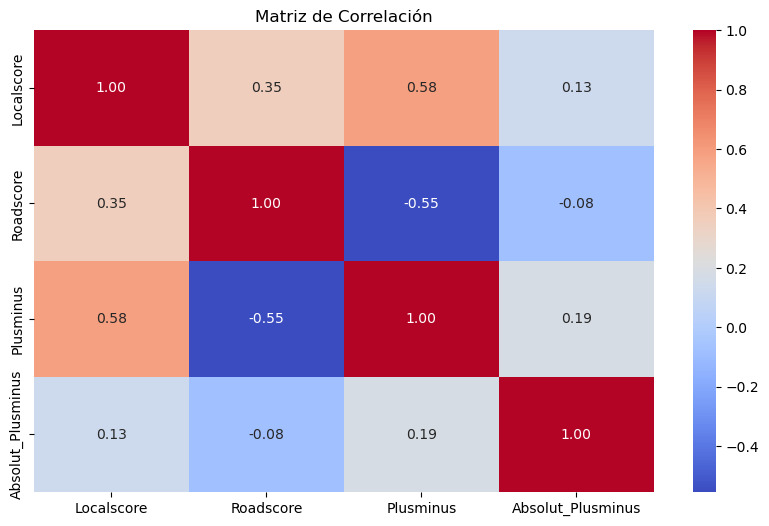

In [31]:
# Correlation / Heatmap
competition_numeric = competition.select_dtypes(include=['float64', 'int64'])
correlation_matrix = competition_numeric.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

**Your comments here**
- # Existe una notable correlación positiva entre variables como localscore y roadscore, lo que es de esperar, ya que los equipos con mayor puntuación local tienden a tener también mayor puntuación de visitantes, lo que indica un buen rendimiento general del equipo independientemente de la sede.

In [53]:
# Trends

**Your comments here**
- ...
- ...